In [2]:
# Import standard libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("Sleep_health_and_lifestyle_dataset.csv")
print(df.info())
df.head(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374 entries, 0 to 373
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Person ID                374 non-null    int64  
 1   Gender                   374 non-null    object 
 2   Age                      374 non-null    int64  
 3   Occupation               374 non-null    object 
 4   Sleep Duration           374 non-null    float64
 5   Quality of Sleep         374 non-null    int64  
 6   Physical Activity Level  374 non-null    int64  
 7   Stress Level             374 non-null    int64  
 8   BMI Category             374 non-null    object 
 9   Blood Pressure           374 non-null    object 
 10  Heart Rate               374 non-null    int64  
 11  Daily Steps              374 non-null    int64  
 12  Sleep Disorder           155 non-null    object 
dtypes: float64(1), int64(7), object(5)
memory usage: 38.1+ KB
None


,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,NaN
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,NaN
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


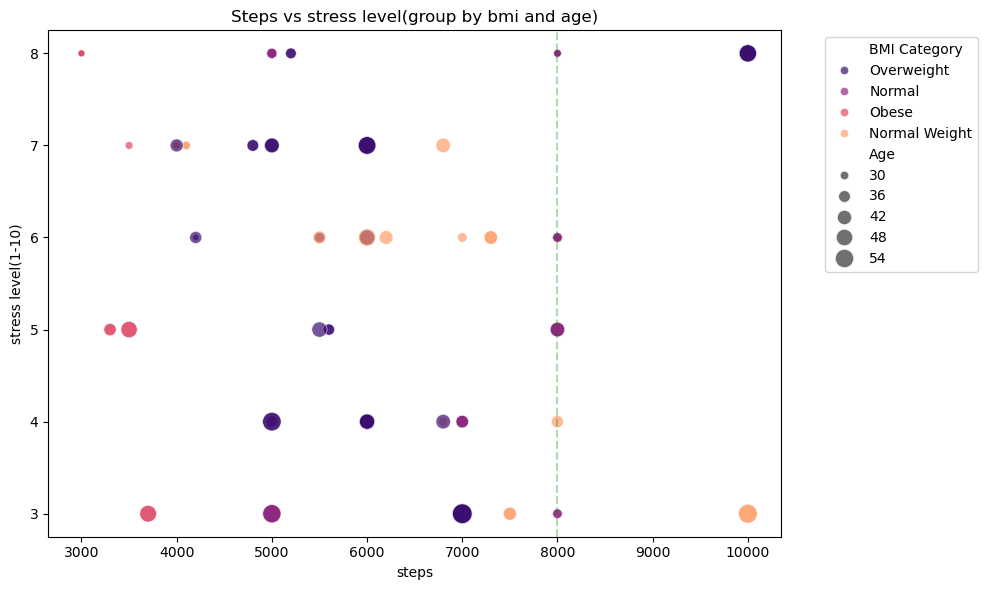

In [3]:

# 绘制散点图
plt.figure(figsize=(10,6))
sns.scatterplot(
    data= df,
    x='Daily Steps',
    y='Stress Level',
    hue='BMI Category',
    palette='magma',
    size='Age',
    sizes=(20,200),
    alpha=0.7
)
plt.title('Steps vs stress level(group by bmi and age)')
plt.xlabel('steps')
plt.ylabel('stress level(1-10)')
plt.axvline(x=8000, color='green', linestyle='--', alpha=0.3)  # 推荐步数参考线
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


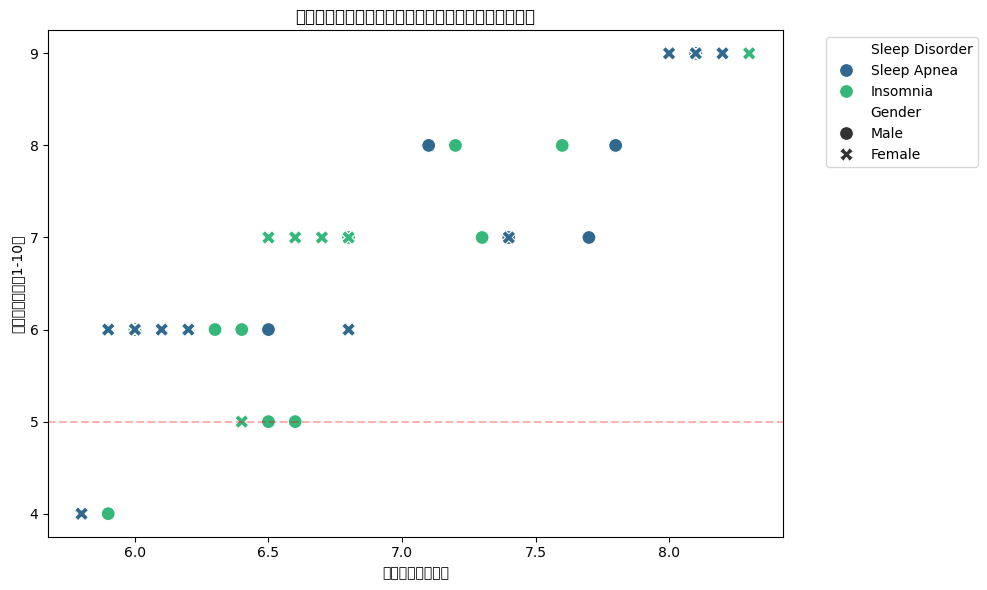

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=df, 
    x='Sleep Duration', 
    y='Quality of Sleep',
    hue='Sleep Disorder',  # 用颜色区分睡眠障碍类型
    style='Gender',       # 用形状区分性别
    palette='viridis',
    s=100
)
plt.title('睡眠时长与睡眠质量的关系（按睡眠障碍和性别分组）')
plt.xlabel('睡眠时长（小时）')
plt.ylabel('睡眠质量评分（1-10）')
plt.axhline(y=5, color='red', linestyle='--', alpha=0.3)  # 低质量睡眠参考线
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

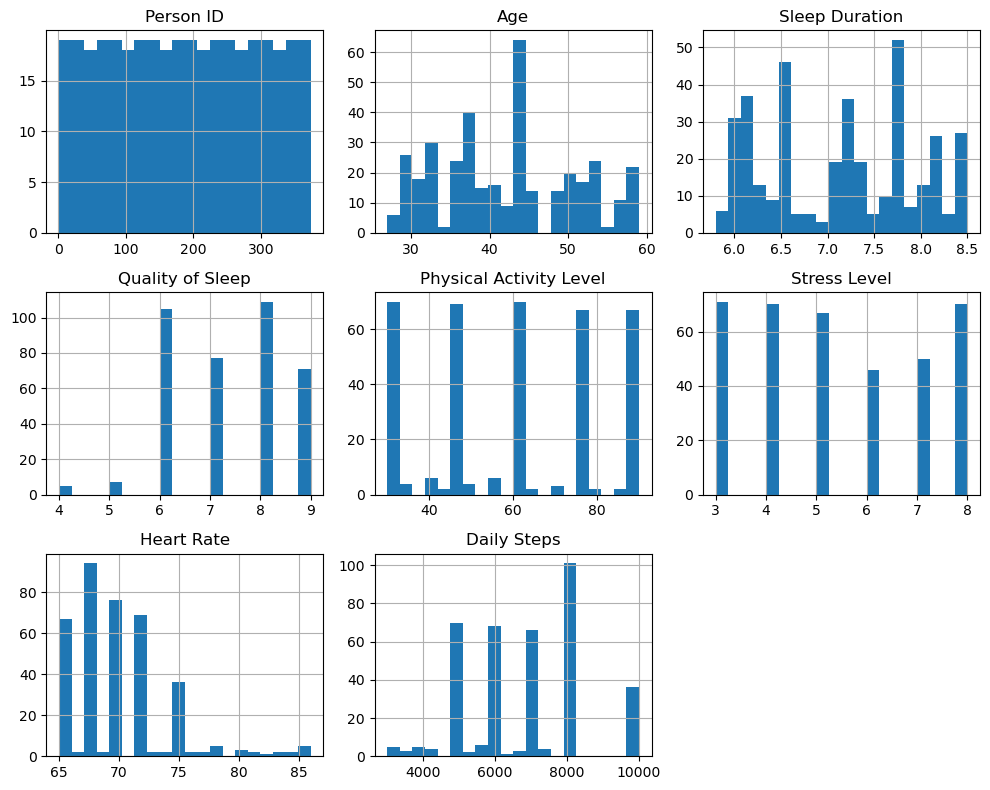

In [5]:
df.hist(bins=20,figsize=(10,8))
plt.tight_layout()
plt.show()


Text(0, 0.5, 'Количество человек')

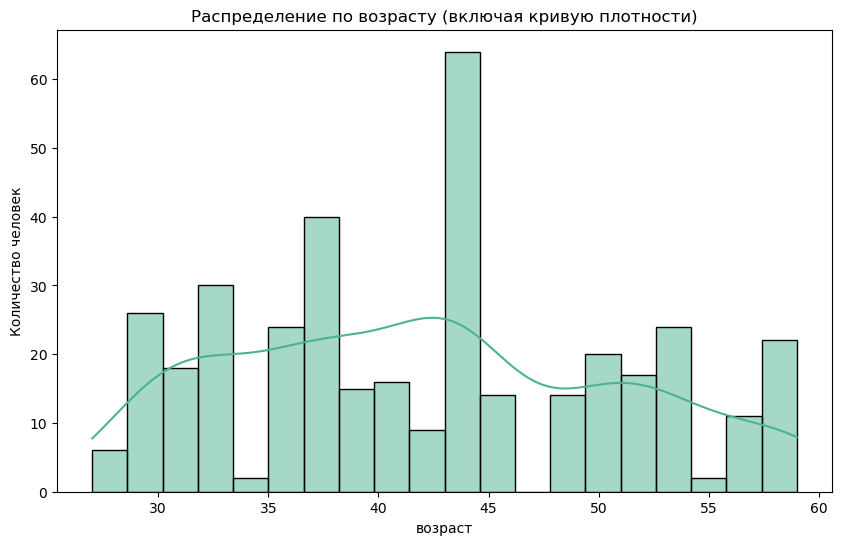

In [7]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='#4CB391')
plt.title('Распределение по возрасту (включая кривую плотности)')
plt.xlabel('возраст')
plt.ylabel('Количество человек')


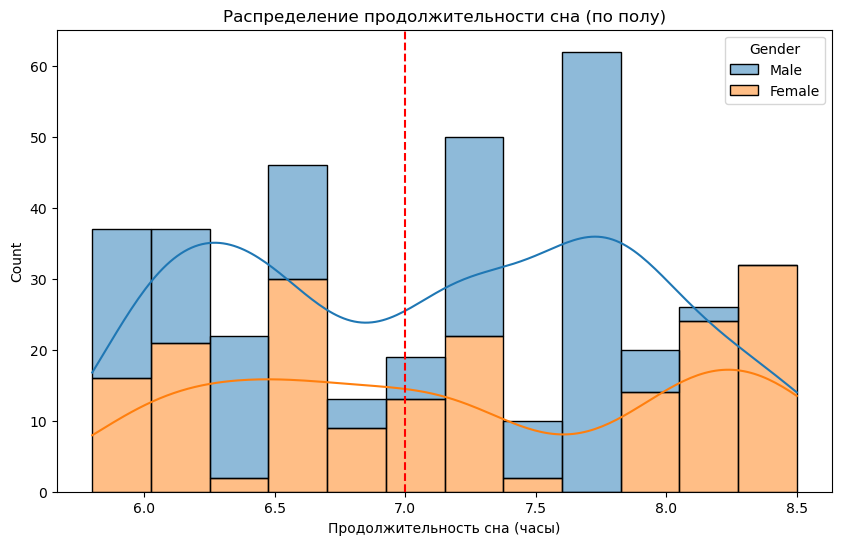

In [8]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Sleep Duration', bins=12, kde=True, hue='Gender', multiple='stack')
plt.title('Распределение продолжительности сна (по полу)')
plt.xlabel('Продолжительность сна (часы)')
plt.axvline(x=7, color='red', linestyle='--', label='Рекомендуемая продолжительность')  # 标记推荐睡眠时长


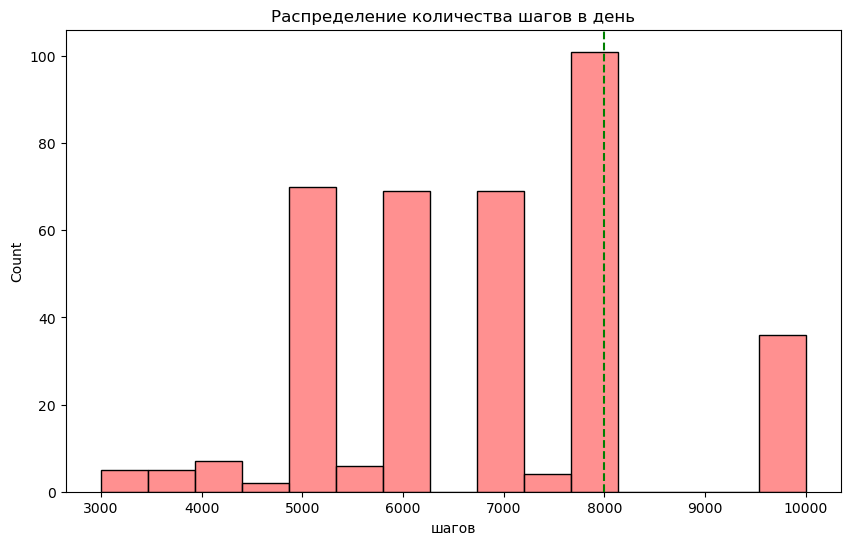

In [11]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Daily Steps', bins=15, color='#FF6B6B')
plt.title('Распределение количества шагов в день')
plt.xlabel('шагов')
plt.axvline(x=8000, color='green', linestyle='--', label='цель')

Text(0.5, 1.0, 'Распределение уровней стресса в разных профессиях')

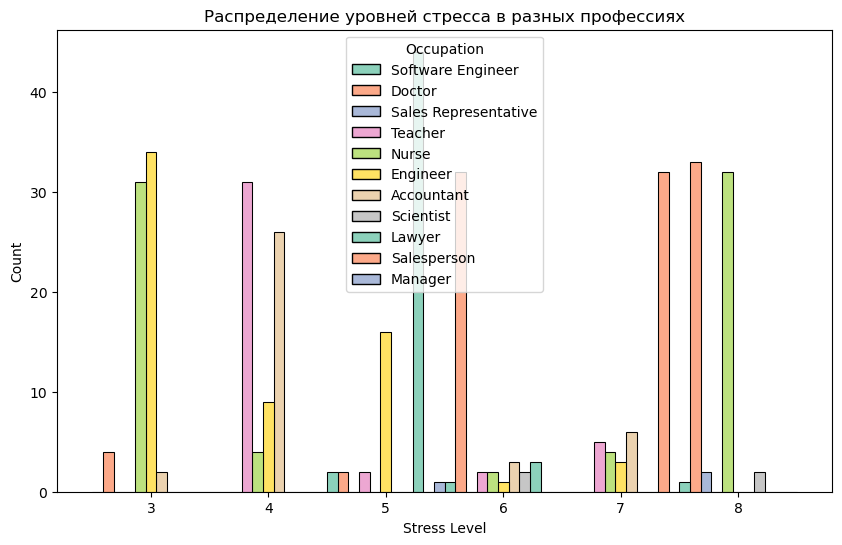

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Stress Level', discrete=True, kde=False, 
             hue='Occupation', multiple='dodge', palette='Set2')
plt.title('Распределение уровней стресса в разных профессиях')

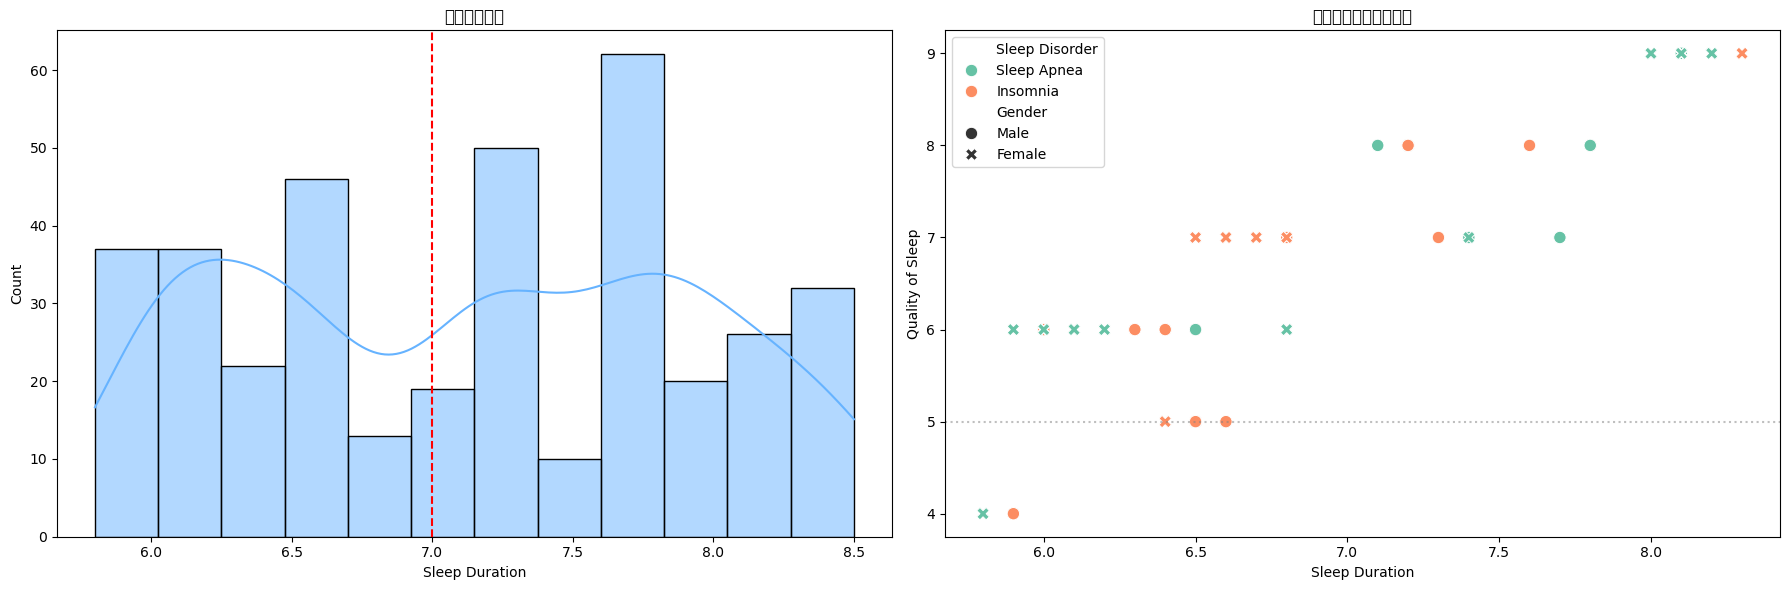

In [14]:
# 组合图设置
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 直方图：睡眠时长分布
sns.histplot(data=df, x='Sleep Duration', bins=12, kde=True, ax=ax1, color='#66b3ff')
ax1.set_title('睡眠时长分布')
ax1.axvline(x=7, color='red', linestyle='--', label='推荐时长')

# 散点图：睡眠时长 vs. 睡眠质量
sns.scatterplot(
    data=df, x='Sleep Duration', y='Quality of Sleep', 
    hue='Sleep Disorder', style='Gender', ax=ax2, palette='Set2', s=80
)
ax2.set_title('睡眠时长与质量的关系')
ax2.axhline(y=5, color='grey', linestyle=':', alpha=0.5)  # 低质量参考线

plt.tight_layout()
plt.show()

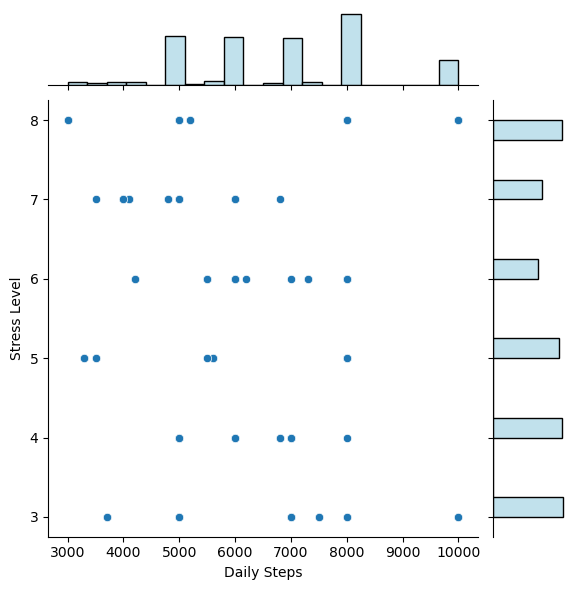

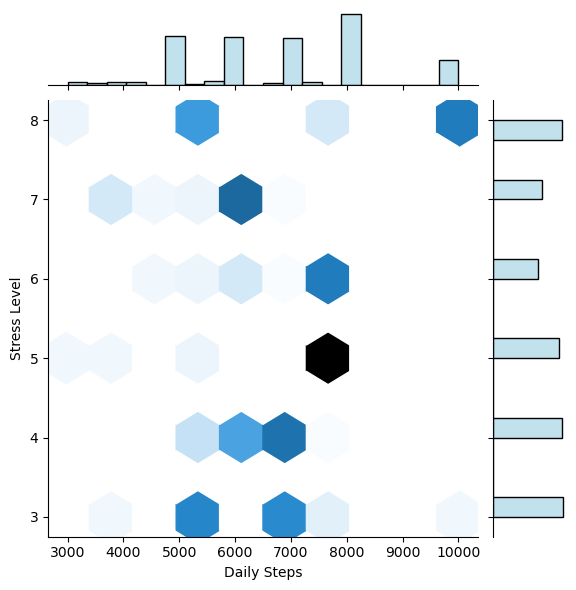

In [15]:
sns.jointplot(x='Daily Steps', y='Stress Level', data=df, kind='scatter', marginal_kws=dict(bins=20, color='lightblue'))
plt.show()
sns.jointplot(x='Daily Steps', y='Stress Level', data=df, kind='hex', marginal_kws=dict(bins=20, color='lightblue'))
plt.show()


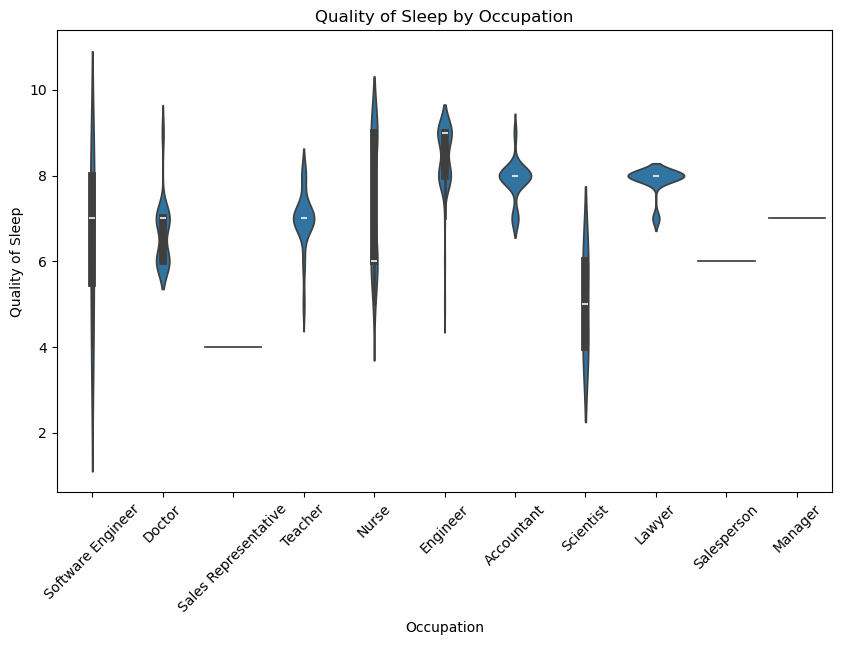

In [17]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='Occupation', y='Quality of Sleep', data=df)
plt.title('Quality of Sleep by Occupation')
plt.xticks(rotation=45)
plt.show()


In [22]:
numerical_columns = df.select_dtypes(include=['int64']).columns
correlation_matrix = df[numerical_columns].corr(method='spearman')
print(correlation_matrix)


                         Person ID       Age  Quality of Sleep  \
Person ID                 1.000000  0.998734          0.420567   
Age                       0.998734  1.000000          0.417810   
Quality of Sleep          0.420567  0.417810          1.000000   
Physical Activity Level   0.142742  0.135680          0.178466   
Stress Level             -0.424725 -0.425622         -0.908147   
Heart Rate               -0.250873 -0.254364         -0.734623   
Daily Steps              -0.038326 -0.041872          0.022779   

                         Physical Activity Level  Stress Level  Heart Rate  \
Person ID                               0.142742     -0.424725   -0.250873   
Age                                     0.135680     -0.425622   -0.254364   
Quality of Sleep                        0.178466     -0.908147   -0.734623   
Physical Activity Level                 1.000000     -0.017497    0.160942   
Stress Level                           -0.017497      1.000000    0.820297   
Hea

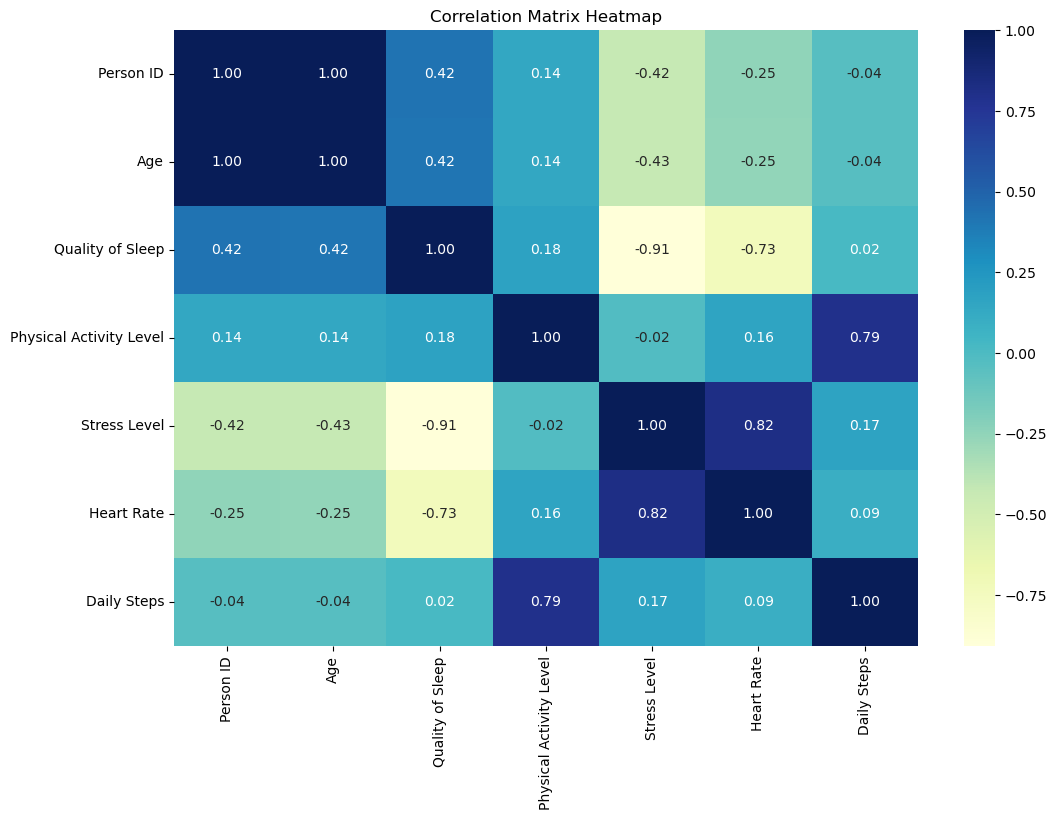

In [23]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap=#'coolwarm'
            'YlGnBu'
            , fmt='.2f')
plt.title('Correlation Matrix Heatmap')
plt.show()


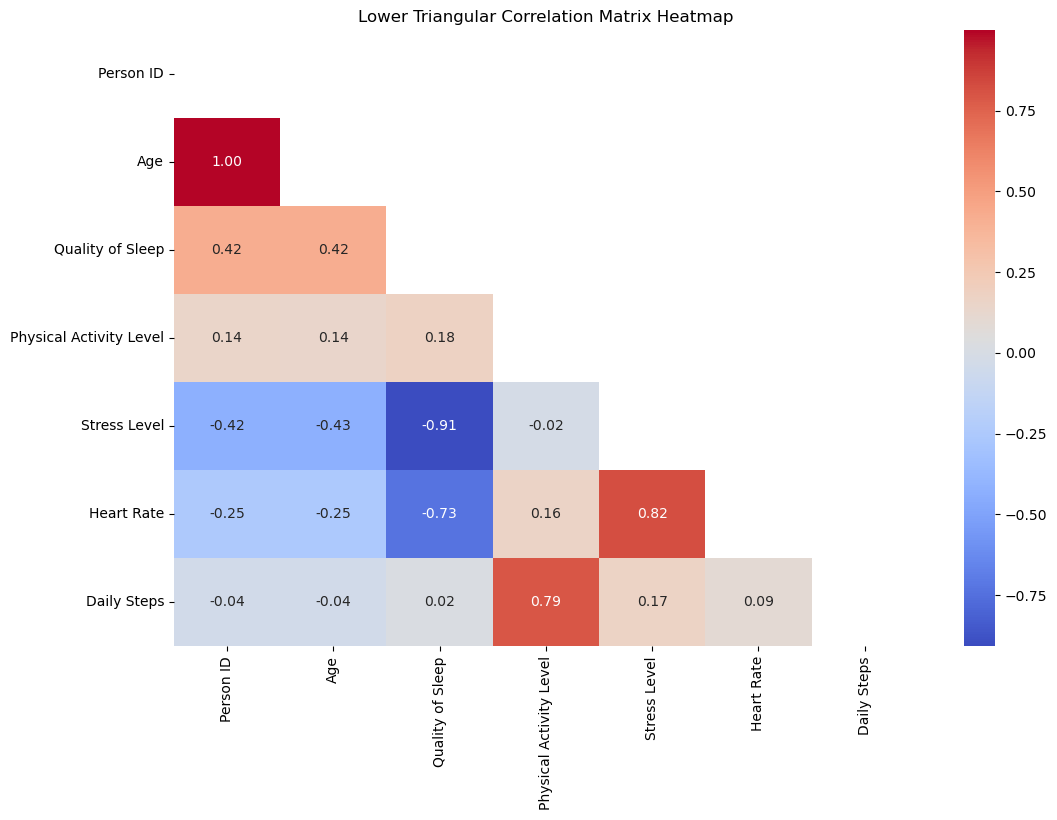

In [24]:
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Lower Triangular Correlation Matrix Heatmap')
plt.show()


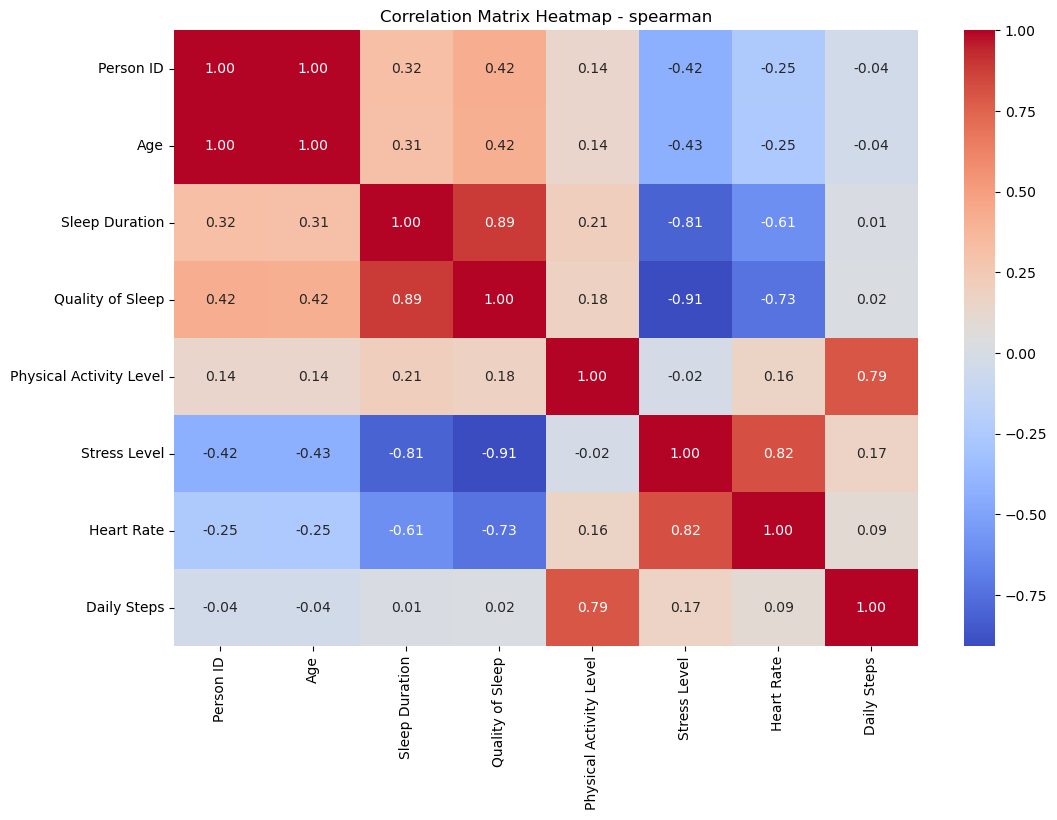

In [28]:

numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

correlation_matrix = df[numerical_columns].corr(
    #method='pearson'
    #method='kendall'
    method='spearman'
)

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Heatmap - spearman')
plt.show()
